<a href="https://colab.research.google.com/github/AnaghaTantry/MIT-Internship/blob/main/Word2VecUSAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Operation
import pandas as pd
import numpy as np
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics
# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Tweets.csv')

In [ ]:
data.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [ ]:
data.shape

(14640, 15)

In [ ]:
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [ ]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Total number of sentiments of tweets : green
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


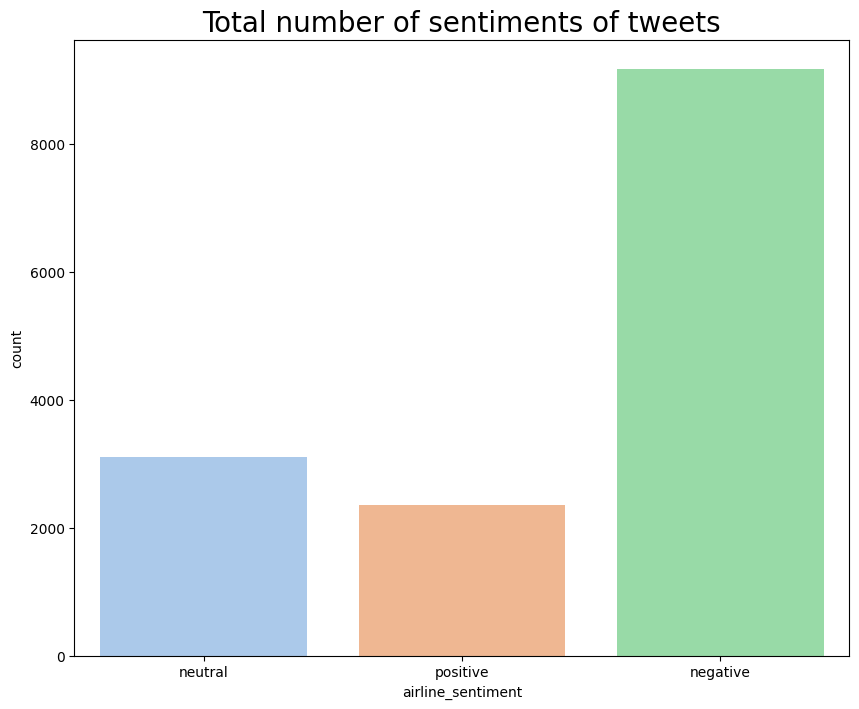

In [ ]:
print("Total number of sentiments of tweets :",'green')
print(data.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = data, palette = 'pastel')
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

Total number of tweets for each airline : green
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


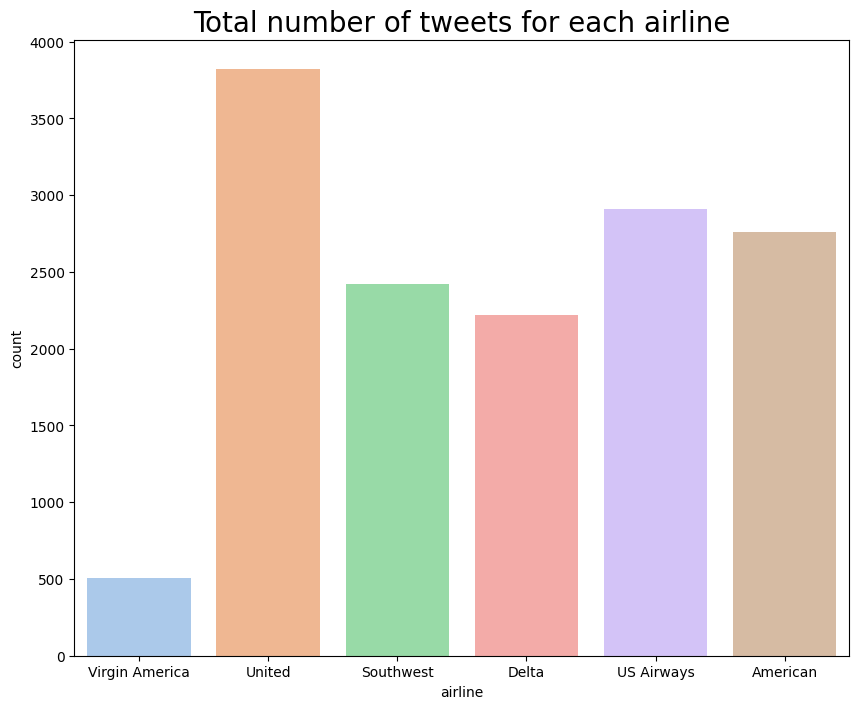

Total number of sentiment tweets for each airline : green
US Airways : 
 airline_sentiment
negative    2263
neutral      381
positive     269
Name: count, dtype: int64
United : 
 airline_sentiment
negative    2633
neutral      697
positive     492
Name: count, dtype: int64
American : 
 airline_sentiment
negative    1960
neutral      463
positive     336
Name: count, dtype: int64
Southwest : 
 airline_sentiment
negative    1186
neutral      664
positive     570
Name: count, dtype: int64
Delta : 
 airline_sentiment
negative    955
neutral     723
positive    544
Name: count, dtype: int64
Virgin America : 
 airline_sentiment
negative    181
neutral     171
positive    152
Name: count, dtype: int64


In [ ]:
print("Total number of tweets for each airline :",'green')
print(data.groupby('airline')['airline_sentiment'].count())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = data, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()
print("Total number of sentiment tweets for each airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),data.loc[data.airline == i].airline_sentiment.value_counts())

Reasons Of Negative Tweets : green
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


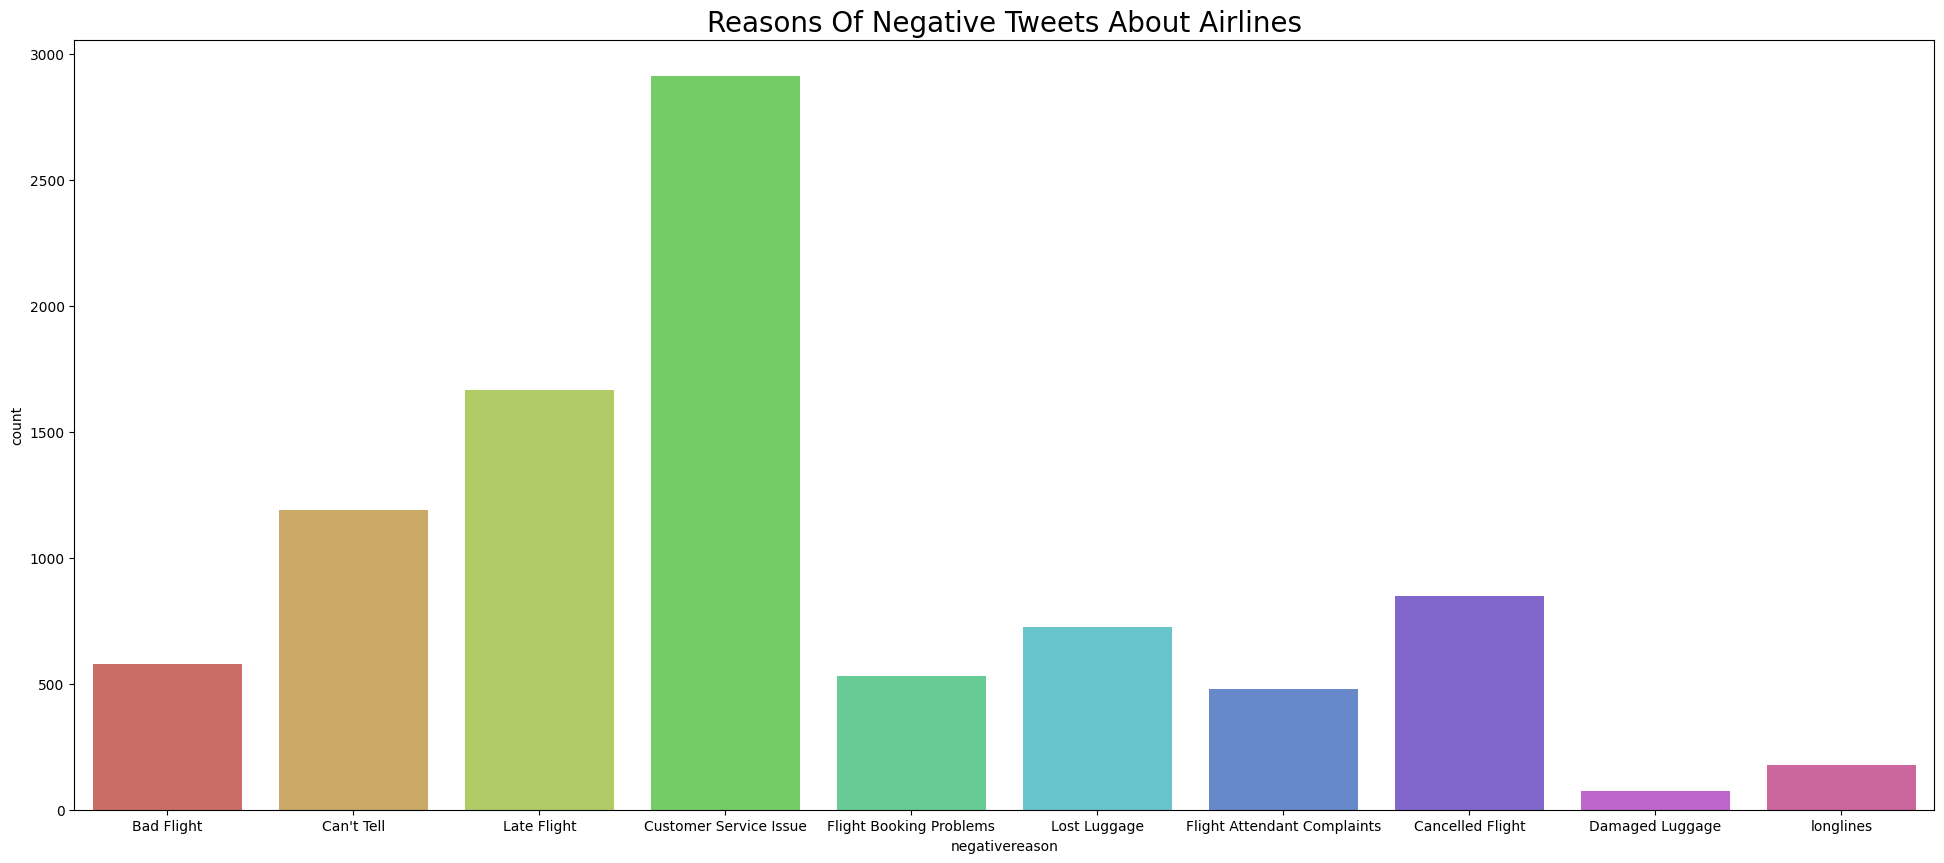

In [ ]:
print('Reasons Of Negative Tweets :','green')
print(data.negativereason.value_counts())

plt.figure(figsize = (24, 10))
sns.countplot(x = 'negativereason', data = data, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

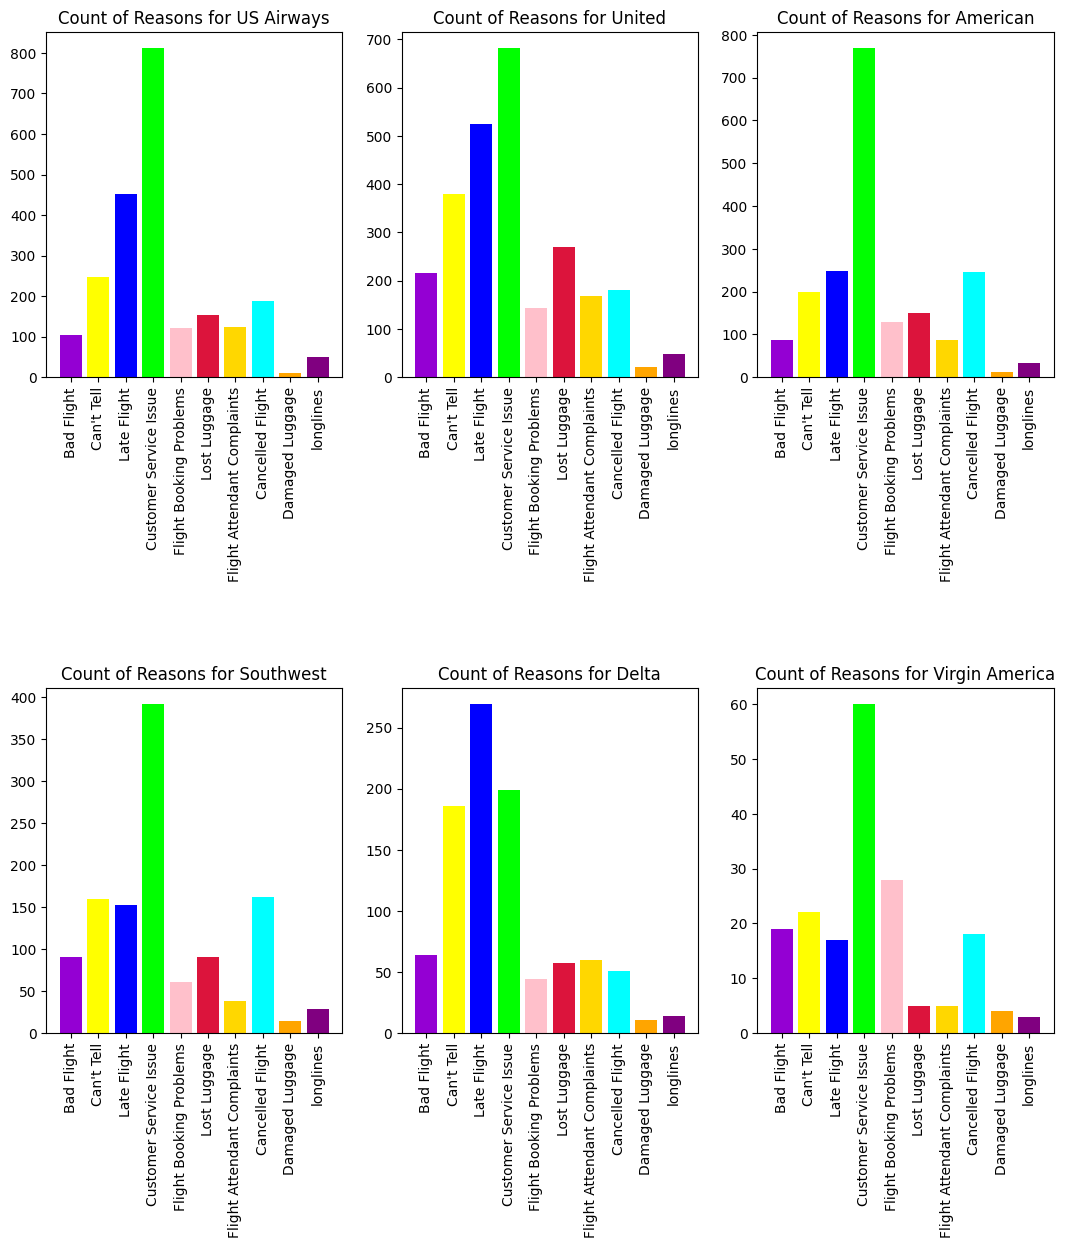

In [ ]:
NR_Count=data['negativereason'].value_counts()
def NCount(Airline):
    airlineName =data[data['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= data['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

In [ ]:
# Split text of Sentiments
positive = data[data['airline_sentiment'] == 'positive'].text
neutral  = data[data['airline_sentiment'] == 'neutral'].text
negative  = data[data['airline_sentiment'] == 'negative'].text

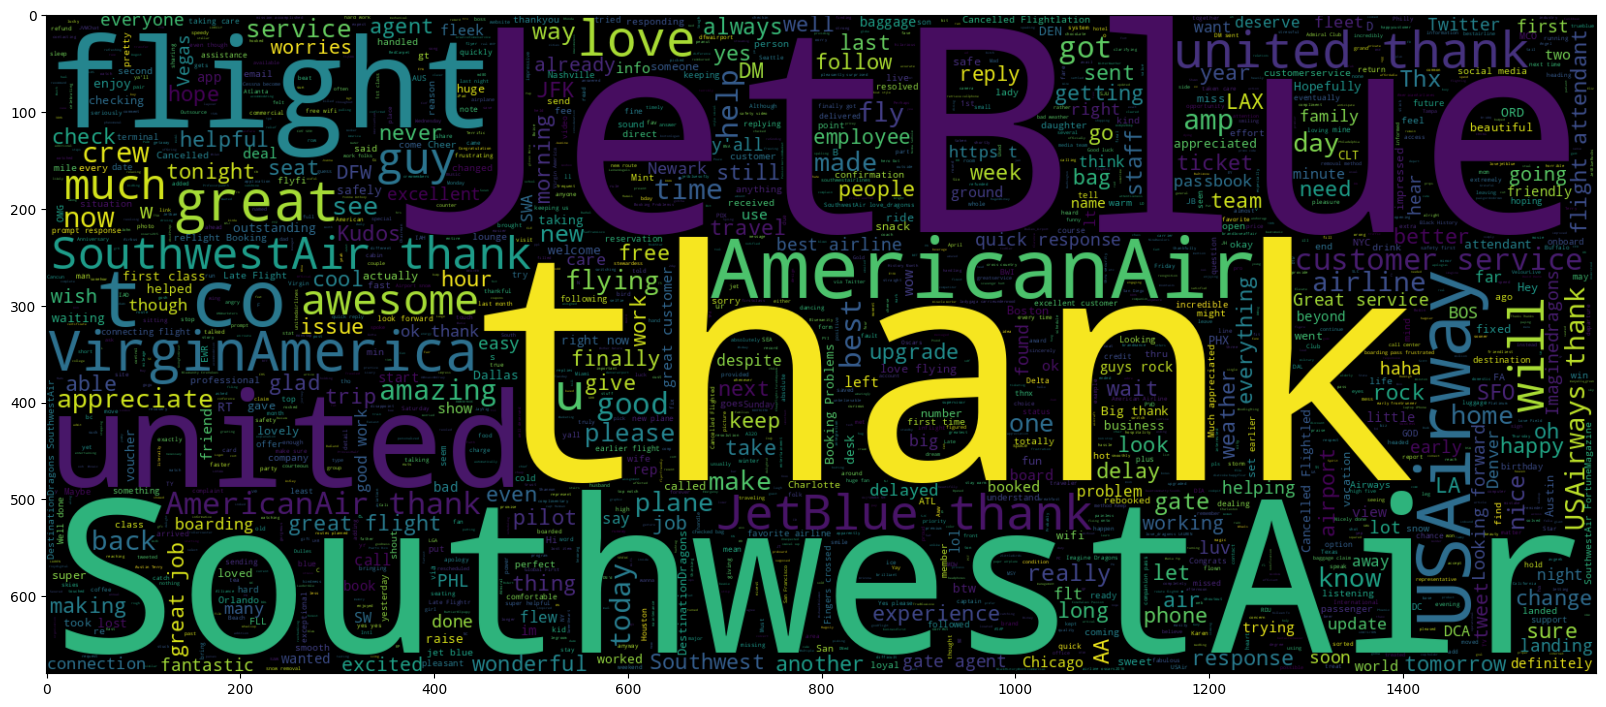

In [ ]:
# world could of positive sentiments
plt.figure(figsize = (20,20))
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(positive))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
ax.grid(False)

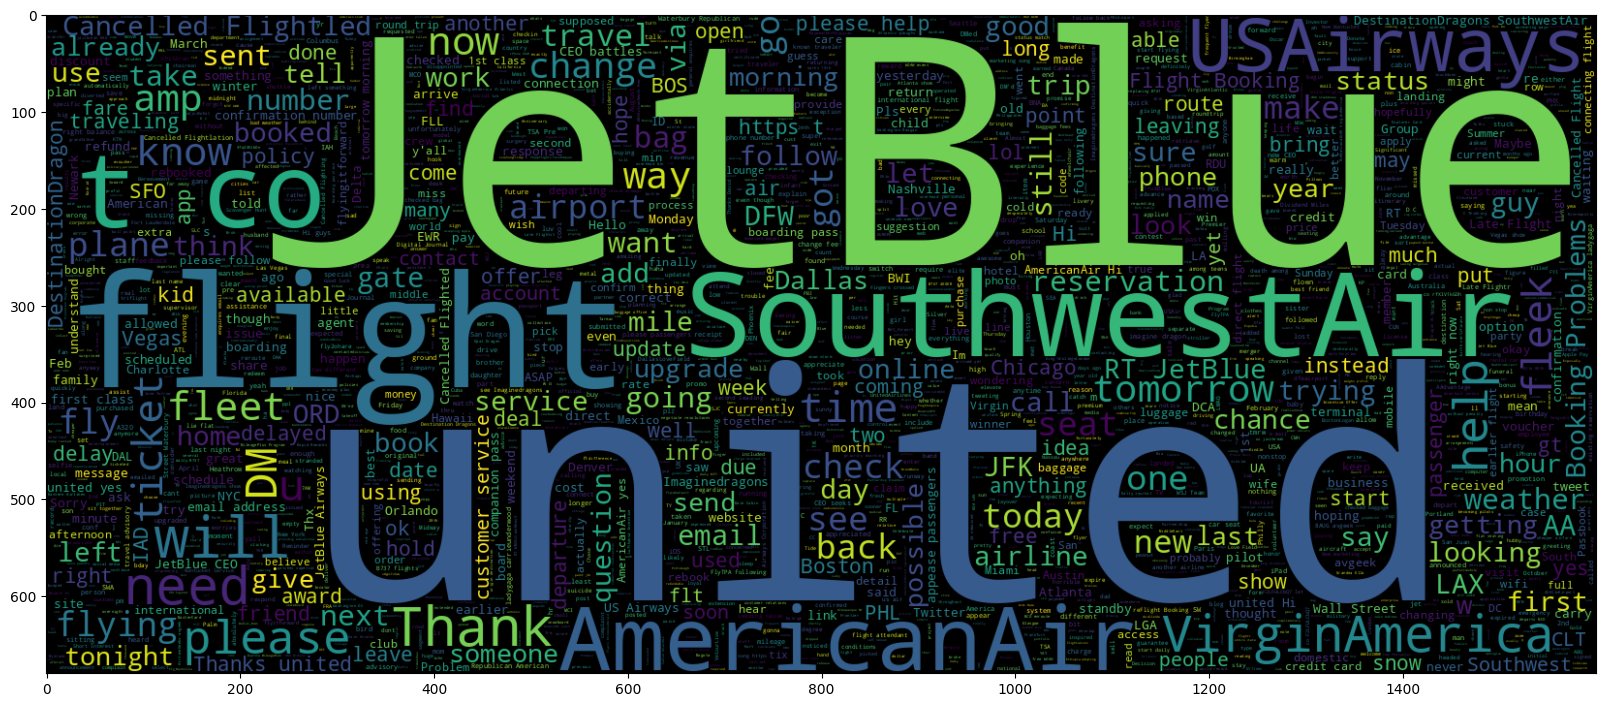

In [ ]:
# world could of neutral sentiments
plt.figure(figsize = (20,20))
worldcould_neutral = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(neutral))
plt.imshow(worldcould_neutral,interpolation = 'bilinear')
ax.grid(False)

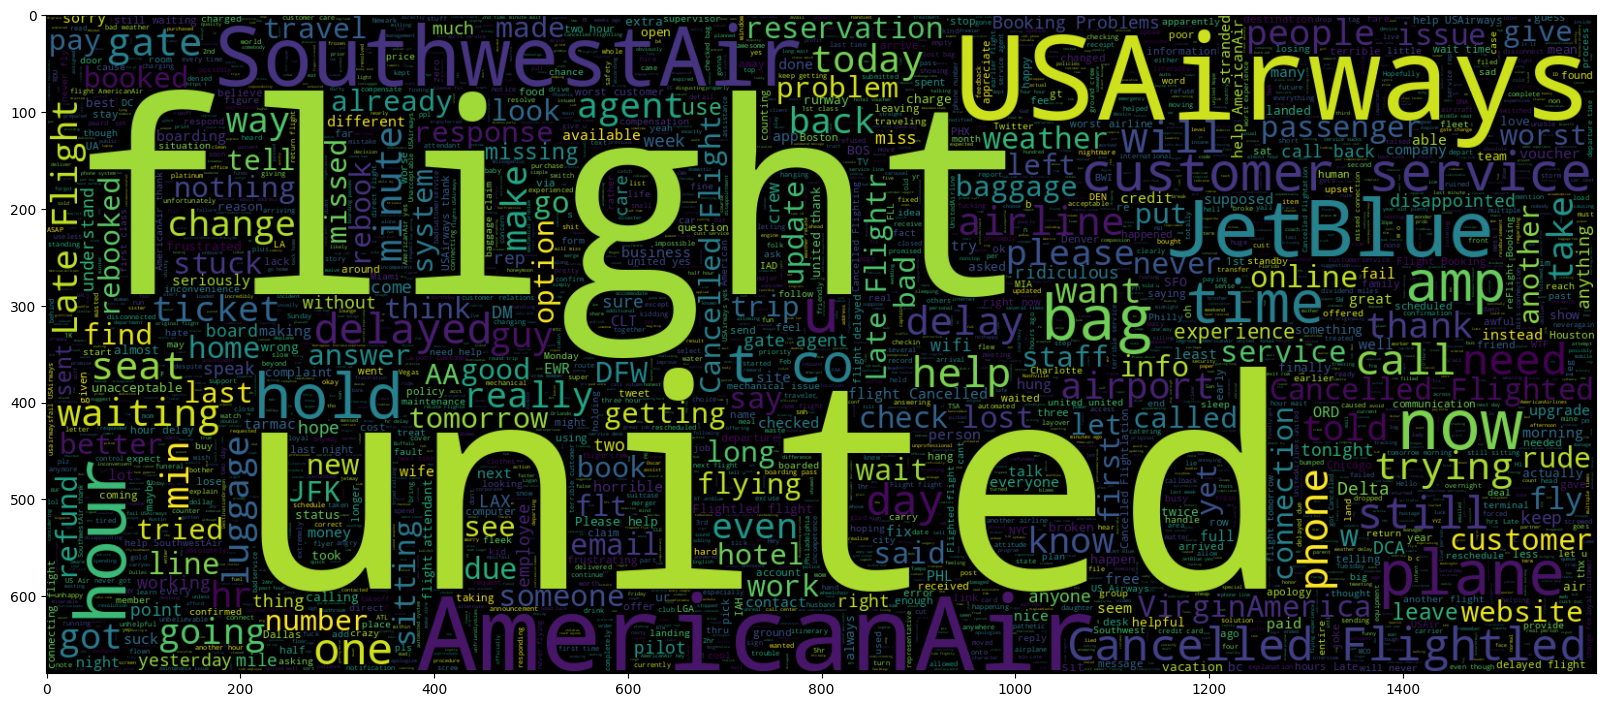

In [ ]:
# world could of negative sentiments
plt.figure(figsize = (20,20))
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

In [ ]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [ ]:
# Apply convert_Sentiment function
data.airline_sentiment = data.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [ ]:
data.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [ ]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
# Remove html
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
import nltk
nltk.download('stopwords')
# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0)

    if len(tchr) > 1:
        return tchr[0:2]

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
data['final_text'] = data['negativereason'].fillna('') + ' ' + data['text']


# Apply functions on tweets
data['final_text'] = data['final_text'].apply(lambda x : remove_username(x))
data['final_text'] = data['final_text'].apply(lambda x : remove_url(x))
data['final_text'] = data['final_text'].apply(lambda x : remove_emoji(x))
data['final_text'] = data['final_text'].apply(lambda x : decontraction(x))
data['final_text'] = data['final_text'].apply(lambda x : seperate_alphanumeric(x))
data['final_text'] = data['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
data['final_text'] = data['final_text'].apply(lambda x : char(x))
data['final_text'] = data['final_text'].apply(lambda x : x.lower())
data['final_text'] = data['final_text'].apply(lambda x : remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# result
data['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

In [ ]:
# Assuming 'final_text' column contains preprocessed text
X = data['final_text'].tolist()
y = data['airline_sentiment'].tolist()

# Tokenization function (already defined in your previous code)
def tokenize_text(text):
    return text.split()  # Assuming text is already tokenized and preprocessed

tokenized_text = [tokenize_text(text) for text in X]


In [ ]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
import numpy as np

# Function to average word vectors for each document
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    n_words = 0

    for word in words:
        if word in vocabulary:
            n_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])

    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)

    return feature_vector

# Get document vectors
document_vectors = [average_word_vectors(tokens, word2vec_model, word2vec_model.wv.index_to_key, 100) for tokens in tokenized_text]

# Convert to numpy array
X_word2vec = np.array(document_vectors)


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE on X_word2vec and y
X_smote, y_smote = smote.fit_resample(X_word2vec, y)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split Data into train & test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_prediction =  rf.predict(X_test)
accuracy_score(rf_prediction,y_test)

0.9329943708007989

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_prediction =  xgb.predict(X_test)
accuracy_score(xgb_prediction,y_test)

0.9366261122208098

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_prediction =  gbc.predict(X_test)
accuracy_score(gbc_prediction,y_test)

0.8082440530234247

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.7653895042672961

In [ ]:
#nb = MultinomialNB()
#nb.fit(X_train,y_train)
#nb_prediction =  nb.predict(X_test)
#accuracy_score(nb_prediction,y_test)

In [ ]:
ds = DecisionTreeClassifier()
ds.fit(X_train,y_train)
ds_prediction =  ds.predict(X_test)
accuracy_score(ds_prediction,y_test)

0.854367169057563

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)
accuracy_score(log_reg_predictions, y_test)

0.7642999818412929

In [ ]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
bagging_predictions = bagging_clf.predict(X_test)
accuracy_score(bagging_predictions, y_test)

0.9004902850917015

In [ ]:
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
adaboost_clf.fit(X_train, y_train)
adaboost_predictions = adaboost_clf.predict(X_test)
accuracy_score(adaboost_predictions, y_test)

0.9397130924278191

In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('svm', svm)
], voting='hard')
voting_clf.fit(X_train, y_train)
voting_predictions = voting_clf.predict(X_test)
accuracy_score(voting_predictions, y_test)

0.761031414563283

In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('svm', svm),
    ('ds', ds)
], voting='hard')
voting_clf.fit(X_train, y_train)
voting_predictions = voting_clf.predict(X_test)
accuracy_score(y_test, voting_predictions)

0.7969856546213909